### 타이타닉

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic_df = pd.read_csv('titanic_train.csv')
titanic_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [3]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(),inplace=True)
titanic_df['Cabin'].fillna('N',inplace=True)
titanic_df['Embarked'].fillna('N',inplace=True)

In [5]:
titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [6]:
titanic_df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [7]:
titanic_df.Cabin.value_counts()

N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

In [8]:
titanic_df.Embarked.value_counts()

S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64

In [9]:
titanic_df.Cabin = titanic_df.Cabin.str[:1]

In [10]:
titanic_df.Cabin.head(3)

0    N
1    C
2    N
Name: Cabin, dtype: object

In [11]:
titanic_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

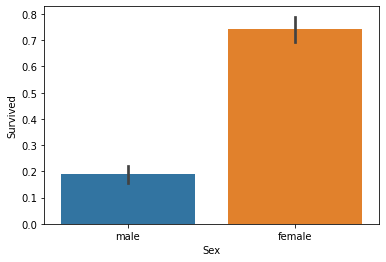

In [12]:
sns.barplot(x='Sex',y='Survived',data=titanic_df)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

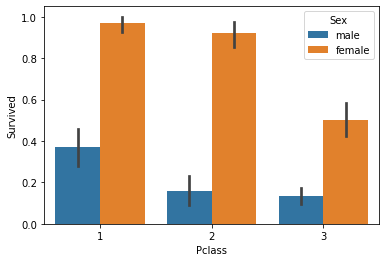

In [13]:
sns.barplot(x='Pclass',y='Survived', hue='Sex',data=titanic_df)

In [14]:
def get_category(age):
    cat=''
    if age <= -1: cat='Unknown'
    elif age <= 5: cat='Baby'
    elif age <= 12: cat='Child'
    elif age <= 18: cat='Teenager'
    elif age <= 25: cat='Student'
    elif age <= 35: cat='Young Adult'
    elif age <= 60: cat='Adult'
    else: cat='Elderly'
    return cat

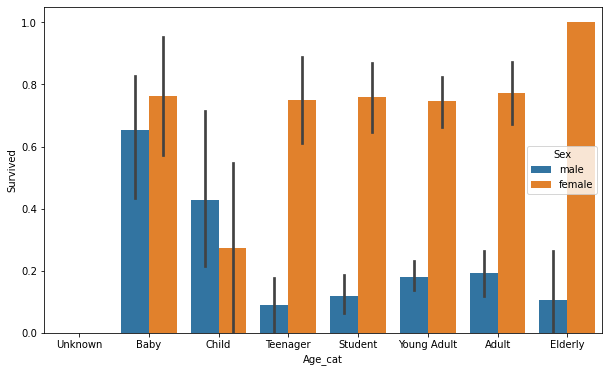

In [15]:
plt.figure(figsize=(10,6))
group_names=['Unknown','Baby','Child','Teenager','Student','Young Adult','Adult','Elderly']
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x:get_category(x))
sns.barplot(x='Age_cat',y='Survived',hue='Sex',data=titanic_df,order=group_names)
titanic_df.drop(columns='Age_cat',inplace=True)

In [16]:
def encode_features(dataDF):
    from sklearn.preprocessing import LabelEncoder
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        dataDF[feature] = LabelEncoder().fit_transform(dataDF[feature])
    return dataDF        

In [17]:
titanic_df = encode_features(titanic_df)
titanic_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0


In [18]:
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df

def drop_features(df):
    df.drop(columns=['PassengerId','Name','Ticket'],inplace=True)
    return df

def format_features(df):
    from sklearn.preprocessing import LabelEncoder
    df.Cabin = df.Cabin.str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        df[feature] = LabelEncoder().fit_transform(df[feature])
    return df     

def transform_feafures(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df    

In [19]:
titanic_df = pd.read_csv('titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop(columns=['Survived'])
X_titanic_df = transform_feafures(X_titanic_df)

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X_titanic_df,
                                                 y_titanic_df,
                                                 test_size=0.2,
                                                 random_state=11)

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [34]:
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()

In [35]:
dt_clf.fit(X_train,y_train)
rf_clf.fit(X_train,y_train)
lr_clf.fit(X_train,y_train)

C:\Users\seonjo\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [36]:
dt_pred = dt_clf.predict(X_test)
rf_pred = rf_clf.predict(X_test)
lr_pred = lr_clf.predict(X_test)

In [37]:
print('dt',accuracy_score(y_test,dt_pred))
print('rf',accuracy_score(y_test,rf_pred))
print('lr',accuracy_score(y_test,lr_pred))

dt 0.7877094972067039
rf 0.8547486033519553
lr 0.8491620111731844


In [38]:
from sklearn.model_selection import KFold

In [43]:
import warnings
warnings.filterwarnings('ignore')

In [52]:
def exec_kfold(clf,folds=5):
    kfold = KFold(n_splits=folds,shuffle=True)
    scores=[]
    for iter_count,(train_index,test_index) in enumerate(kfold.split(X_titanic_df)):
        X_train,X_test = X_titanic_df.values[train_index],X_titanic_df.values[test_index]
        y_train,y_test = y_titanic_df.values[train_index],y_titanic_df.values[test_index]
        clf.fit(X_train,y_train)
        pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test,pred)
        scores.append(accuracy)
        print(f'교차검증 {iter_count} 정확도:{accuracy:.4f}')
    mean_score = np.mean(scores)
    print(f'평균 정확도:{mean_score:.4f}')

In [75]:
exec_kfold(dt_clf) #dt 0.7877094972067039
# 교차검증 0 정확도:0.7542
# 교차검증 1 정확도:0.7809
# 교차검증 2 정확도:0.7865
# 교차검증 3 정확도:0.7697
# 교차검증 4 정확도:0.8202
# 평균 정확도:0.7823

교차검증 0 정확도:0.8212
교차검증 1 정확도:0.7809
교차검증 2 정확도:0.7809
교차검증 3 정확도:0.7135
교차검증 4 정확도:0.7921
평균 정확도:0.7777


In [54]:
exec_kfold(rf_clf) #rf 0.8547486033519553
# 교차검증 0 정확도:0.7933
# 교차검증 1 정확도:0.8090
# 교차검증 2 정확도:0.8371
# 교차검증 3 정확도:0.7753
# 교차검증 4 정확도:0.8596
# 평균 정확도:0.8148

교차검증 0 정확도:0.8045
교차검증 1 정확도:0.7809
교차검증 2 정확도:0.7697
교차검증 3 정확도:0.8652
교차검증 4 정확도:0.7978
평균 정확도:0.8036


In [55]:
exec_kfold(lr_clf) #lr 0.8491620111731844
# 교차검증 0 정확도:0.8045
# 교차검증 1 정확도:0.7809
# 교차검증 2 정확도:0.7753
# 교차검증 3 정확도:0.7584
# 교차검증 4 정확도:0.8146
# 평균 정확도:0.7867

교차검증 0 정확도:0.7989
교차검증 1 정확도:0.7809
교차검증 2 정확도:0.8034
교차검증 3 정확도:0.7584
교차검증 4 정확도:0.8090
평균 정확도:0.7901


In [48]:
from sklearn.model_selection import cross_val_score

In [76]:
scores = cross_val_score(dt_clf,X_titanic_df,y_titanic_df,cv=5)
for iter_count,accuracy in enumerate(scores):
    print(f'교차검증 {iter_count} 정확도 : {accuracy:.4f}')
print(f'평균정확도:{np.mean(scores):.4f}')    

교차검증 0 정확도 : 0.7430
교차검증 1 정확도 : 0.7753
교차검증 2 정확도 : 0.7921
교차검증 3 정확도 : 0.7865
교차검증 4 정확도 : 0.8427
평균정확도:0.7879


In [77]:
scores = cross_val_score(rf_clf,X_titanic_df,y_titanic_df,cv=5)
for iter_count,accuracy in enumerate(scores):
    print(f'교차검증 {iter_count} 정확도 : {accuracy:.4f}')
print(f'평균정확도:{np.mean(scores):.4f}')    

교차검증 0 정확도 : 0.7933
교차검증 1 정확도 : 0.7978
교차검증 2 정확도 : 0.8483
교차검증 3 정확도 : 0.7640
교차검증 4 정확도 : 0.8652
평균정확도:0.8137


In [78]:
scores = cross_val_score(lr_clf,X_titanic_df,y_titanic_df,cv=5)
for iter_count,accuracy in enumerate(scores):
    print(f'교차검증 {iter_count} 정확도 : {accuracy:.4f}')
print(f'평균정확도:{np.mean(scores):.4f}')   

교차검증 0 정확도 : 0.7989
교차검증 1 정확도 : 0.7697
교차검증 2 정확도 : 0.7809
교차검증 3 정확도 : 0.7753
교차검증 4 정확도 : 0.8034
평균정확도:0.7856


In [79]:
from sklearn.model_selection import GridSearchCV

In [81]:
parameters = {
    'max_depth':[2,3,5,10],
    'min_samples_split':[2,3,5],
    'min_samples_leaf':[1,5,8]
}

In [82]:
grid_dclf = GridSearchCV(dt_clf,param_grid=parameters,scoring='accuracy',cv=5)
grid_dclf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=11),
             param_grid={'max_depth': [2, 3, 5, 10],
                         'min_samples_leaf': [1, 5, 8],
                         'min_samples_split': [2, 3, 5]},
             scoring='accuracy')

In [83]:
grid_dclf.cv_results_

{'mean_fit_time': array([0.00325809, 0.00278296, 0.00431838, 0.00258656, 0.00358138,
        0.00209804, 0.00226283, 0.0011898 , 0.00202608, 0.00180449,
        0.00186057, 0.00199399, 0.00232539, 0.00253887, 0.00230808,
        0.00270309, 0.00226603, 0.00192442, 0.0019105 , 0.00203133,
        0.00185471, 0.00225224, 0.00208488, 0.00223098, 0.00184484,
        0.00186024, 0.00217609, 0.00203128, 0.00248575, 0.00234046,
        0.00298433, 0.00307369, 0.00252986, 0.00198288, 0.0021369 ,
        0.00228109]),
 'std_fit_time': array([9.25376063e-04, 8.87501952e-04, 8.36789797e-04, 3.53846503e-04,
        1.32122734e-03, 8.35697626e-05, 3.36758289e-04, 3.05804023e-04,
        5.16665922e-04, 4.00518820e-04, 4.43856189e-04, 7.72780194e-05,
        4.26949793e-04, 6.29894692e-04, 2.56044744e-04, 6.06017250e-04,
        4.25119959e-04, 4.93164081e-04, 4.54934022e-04, 2.91866918e-04,
        4.32752811e-04, 3.54044818e-04, 1.69326050e-04, 2.51185151e-04,
        2.18409086e-04, 4.96394504e-0

In [84]:
grid_dclf.best_params_

{'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}

In [85]:
grid_dclf.best_score_

0.7991825076332119

In [86]:
best_dclf = grid_dclf.best_estimator_

In [87]:
dpred = best_dclf.predict(X_test)

In [88]:
accuracy_score(y_test,dpred)

0.8715083798882681